# Waffle Charts

By **Franklin Oliveira**

-----
Database: <font color='blue'>'Planilha geral Atualizada FINAL 5_GERAL_sendo trabalhada no Google drive.xlsx'</font>

## Basic imports

In [1]:
import datetime
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from collections import defaultdict

# this package does most of the heavy work of constructing the Waffle Charts
# docs: https://pywaffle.readthedocs.io/en/latest/examples/block_shape_distance_location_and_direction.html
from pywaffle import Waffle 

alt.renderers.enable('default')

RendererRegistry.enable('default')

## Importing data...

In [2]:
NewTable = pd.read_csv('./data/treated_db.csv', sep=';', encoding='utf-8-sig', low_memory=False)

## Filtering

At least for now, we'll be considering only specimens of order decapoda (deeply revised by the Museum's crew)

In [3]:
decapoda = NewTable[NewTable['order'] == 'Decapoda'].copy()

In [4]:
# correcting astacidea infraorder (astacidae is a family, not infraorder)
decapoda['infraorder'] = decapoda['infraorder'].apply(lambda x: 'Astacidea' if str(x) == 'Astacidae' else x)

<br>

<font size=5>**Color palette**</font>

Colors (per infraorder): 

- <font color='#e26d67'><b>Ascacidae</b></font>
- <font color='#007961'><b>Anomura</b></font>
- <font color='#7a2c39'><b>Achelata</b></font>
- <font color='#b67262'><b>Axiidea</b></font>
- <font color='#ee4454'><b>Brachyura</b></font>
- <font color='#3330b7'><b>Caridea</b></font>
- <font color='#58b5e1'><b>Gebiidea</b></font>
- <font color='#b8e450'><b>Stenopodídea</b></font>
- <font color='#a0a3fd'><b>Astacidae</b></font>
- <font color='#deae9e'><b>Polychelida</b></font>
- <font color='#d867be'><b>Grapsidae</b></font>
- <font color='#fece5f'><b>Xanthoidea</b></font>

In [5]:
# importing customized color palettes
from src.MNViz_colors import *

## Waffle Charts

----

### 1- Orders

In [6]:
def calcPercentages(df, col='order', discard_col= 'index'):
    
    if discard_col == 'index':
        temp = df.reset_index()
    else:
        temp = df
    
    percent = temp.groupby(col).count()[discard_col].reset_index().rename(
                                                                    columns={discard_col:'counts'})
    percent['percent'] = percent['counts'] / percent['counts'].sum()
    percent['percent'] = percent['percent'] * 100
    
    return percent

In [7]:
percent = calcPercentages(decapoda, col='infraorder')
percent.head()

,infraorder,counts,percent
0,Achelata,59,0.708879
1,Anomura,1328,15.955785
2,Astacidea,57,0.684849
3,Axiidea,57,0.684849
4,Brachyura,3677,44.178782


In [8]:
# adicionando coluna com as cores por ordem
percent['cores'] = percent['infraorder'].apply(lambda x: cores_infraordem[x])

In [9]:
percent.sort_values('percent', inplace=True)

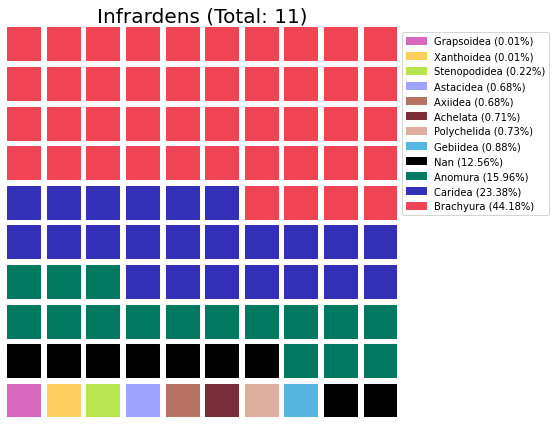

In [10]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
    tight_layout=True,
    rounding_rule='floor',
    values=[i for i in percent['percent']],
    colors=list(percent['cores']),
    title={
        'label': f'Infrardens (Total: {11})', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['infraorder'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     block_arranging_style='snake',  # new-line
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

# plt.savefig('./graphs/waffles/infraordens.svg')
# plt.savefig('./graphs/waffles/infraordens.png')

plt.show()

<br>

<font color='red' size='5'>**Problema:** No gráfico acima, ele insiste em desenhar ordens de valor muito pequeno </font>

<br>

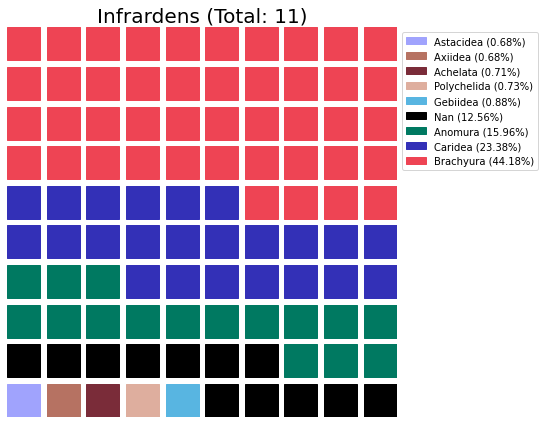

In [23]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
    tight_layout=True,
    rounding_rule='floor',
    values=[round(i,1) for i in percent['percent'] if round(i) > 0],
    colors=[c for c,v in zip(percent['cores'], percent['percent']) if round(v) > 0],
    title={
        'label': f'Infrardens (Total: {11})', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['infraorder'], percent['percent']) if round(v) > 0],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     block_arranging_style='snake',  # new-line
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

# plt.savefig('./graphs/waffles/infraordens1.svg')
# plt.savefig('./graphs/waffles/infraordens1.png')

plt.show()

<br>

-----

### 2- Infraorders per family

Inverting... families per infraorder

In [24]:
percent = calcPercentages(decapoda[decapoda['family'] == 'Eunicidae'])
percent.sort_values('counts', inplace=True)

In [25]:
# adicionando coluna com as cores por ordem
percent['cores'] = percent['order'].apply(lambda x:cores_ordem[x])

In [26]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
#     rounding_rule='floor',
    values=list(percent['percent']),
    colors=list(percent['cores']),
    title={
        'label': 'Eunicidae', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['order'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

# plt.savefig('./graphs/waffles/ordens.svg')
# plt.savefig('./graphs/waffles/ordens.png')

plt.show()

ValueError: Argument values or at least one of rows and columns required.

In [40]:
# family_counts = decapoda['family'].value_counts().reset_index()
# family_counts.columns = ['family', 'count']

infraorder_counts = decapoda['infraorder'].value_counts().reset_index()
infraorder_counts.columns = ['infraorder', 'count']


decapoda.sort_values('infraorder', inplace=True)

In [63]:
d = defaultdict()

index=0
for infraorder in decapoda['infraorder'].unique():
    # filtrando a base e calculando percentuais
    temp = calcPercentages(decapoda[decapoda['infraorder']==infraorder], col='family')
    temp.sort_values('percent', inplace=True)
    
    # criando coluna de cores
    temp['cores'] = temp['family'].apply(lambda x:cores_familia_naive[x] if x in cores_familia_naive.keys() else '#000000')
    
    # contagem
    count = infraorder_counts[infraorder_counts['infraorder'] == infraorder]['count'].values[0] 
       
    index +=1
    
    #dict for chart
    d[(6,2,index)]= { 
        'rows':10, 
    #     columns=10, 
    #     rounding_rule='floor',
        'values':list(temp['percent']),
        'colors':list(temp['cores']),
        # p.s.: thousands separator is: ,
        'title':{
            'label': f'Infraordem: {infraorder}\nTotal de registros: {count}'.replace(',','.'),
            'loc': 'left', 'fontsize':18},
        'icon_legend':True,
    }
        
d = dict(d)
# d

#### Making `waffle charts`

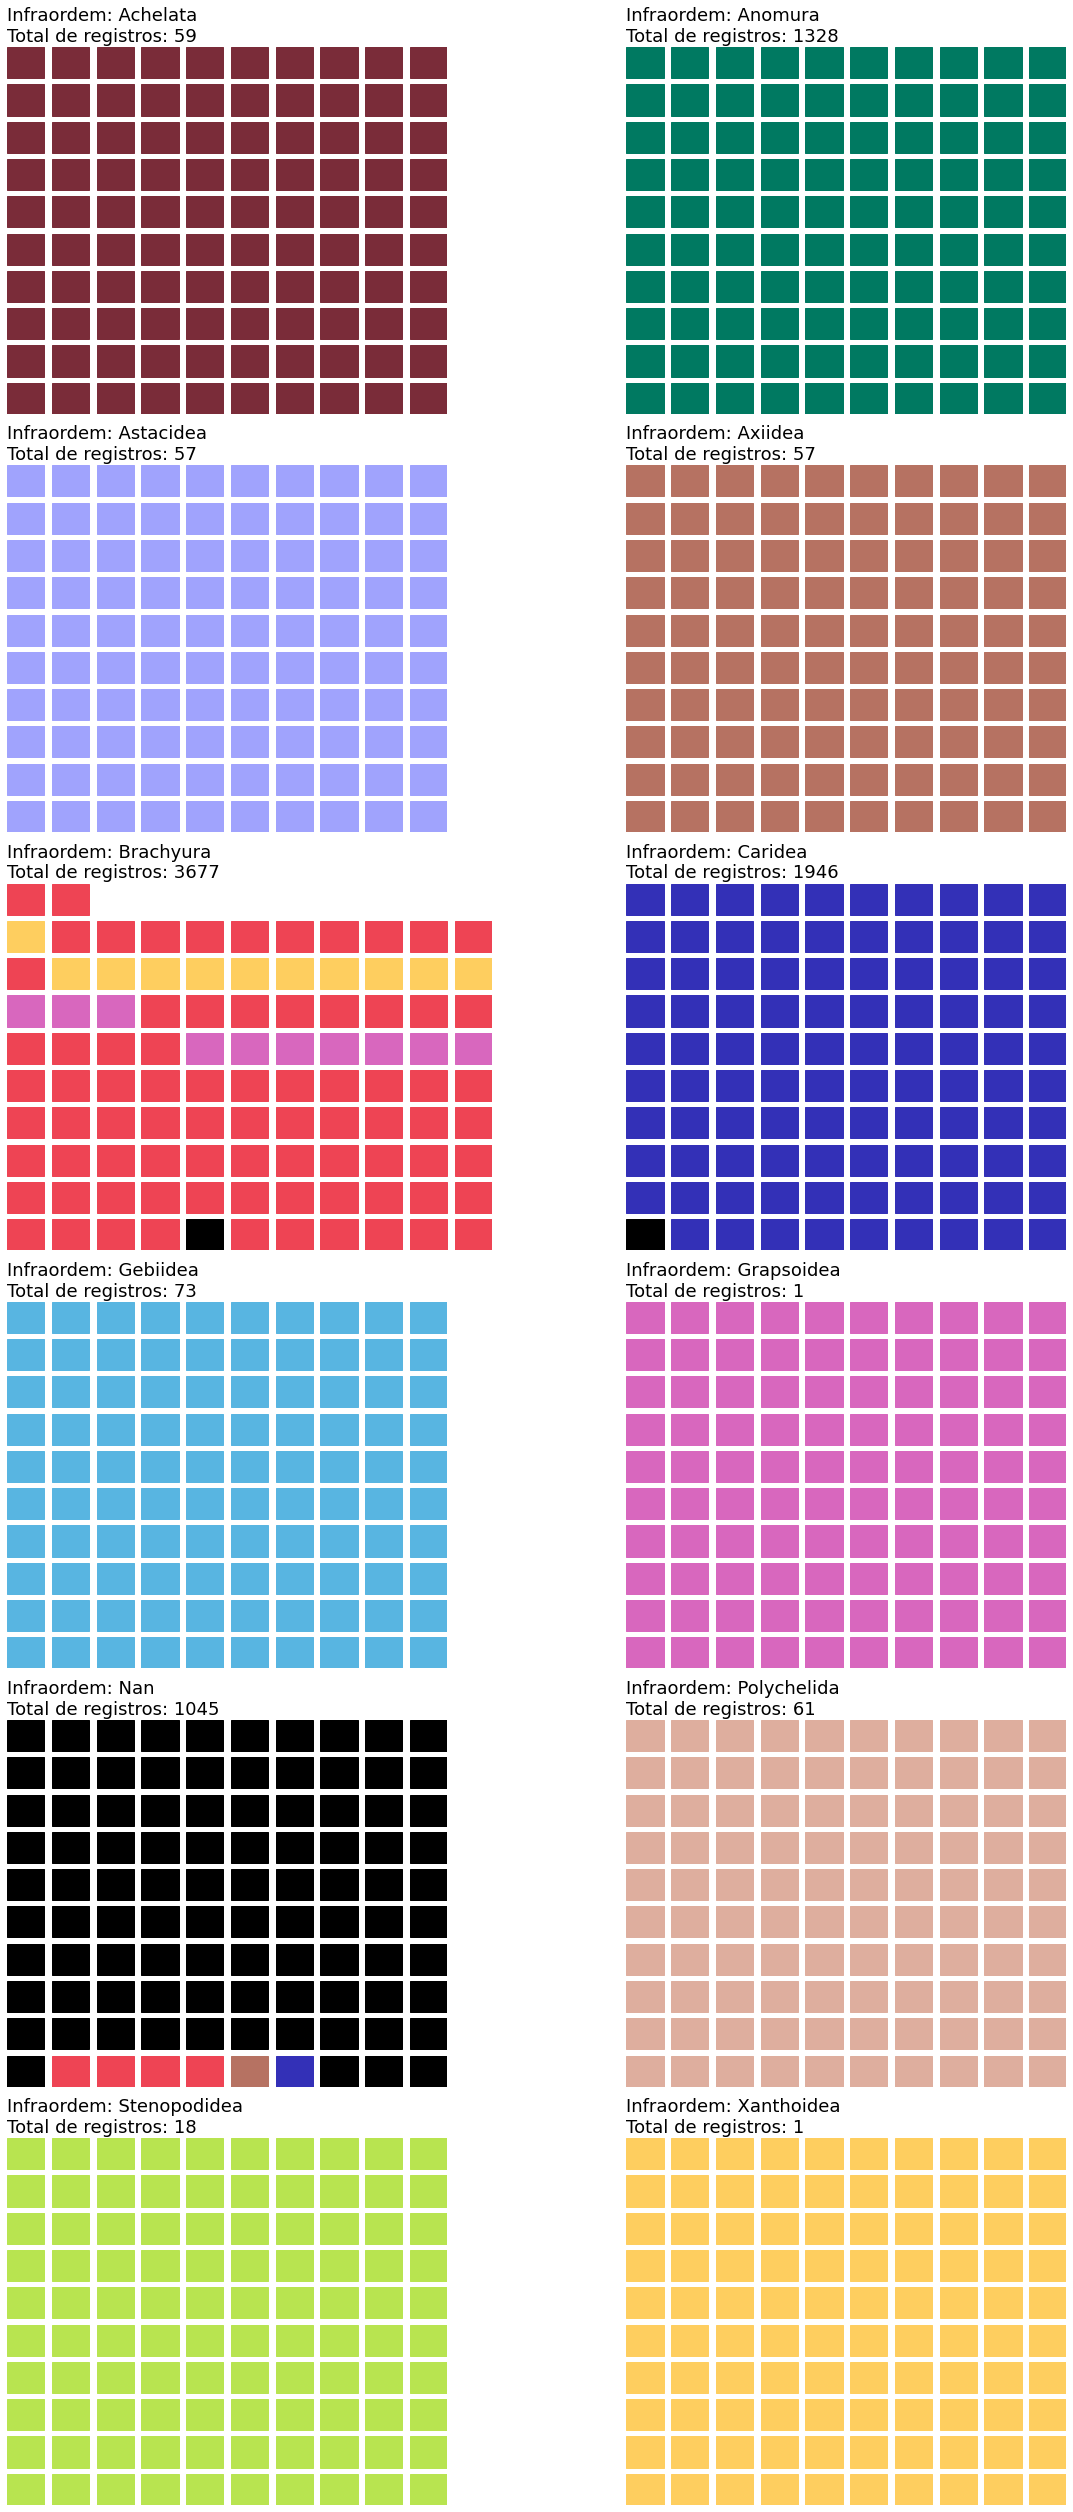

In [64]:
teste = plt.figure(
    FigureClass= Waffle,
    plots= d,
    rows=10, 
#     columns=10, 
    vertical=True, 
    block_aspect_ratio=1.2,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(35, 35)  # figsize is a parameter of matplotlib.pyplot.figure
    
)

# saving charts
# plt.savefig('./graphs/waffles/familias.svg')
plt.savefig('./graphs/waffles/familias.png')

plt.show()

<br>

**The end!**

-----

In [17]:
# for col in NewTable.columns:
#     print('-', col)

In [37]:
# contar quantas ordens diferentes tem por familia

d = defaultdict()
for family in NewTable['family'].unique():
    d[family] = NewTable[NewTable['family'] == family]['infraorder'].nunique()

In [39]:
# dict(d)